In [1]:
import torch
loaded_tensor_dict = torch.load('/home/samyakr2/SHOP/ARK/output/multilabel_dict.pth')

In [16]:
# loaded_tensor_dict.keys()

In [17]:
numpy_dict = {}

# Iterate over the keys of the original dictionary
for key, value in loaded_tensor_dict.items():
    # Find the index of the maximum value   
    max_index = torch.argmax(value)
    
    # Create a numpy array of length 103 with the argmax index as 1 and other indices as 0
    numpy_array = torch.zeros(103)
    numpy_array[max_index] = 1

    # Store the numpy array in the new dictionary
    numpy_dict[key] = numpy_array

# Print the new dictionary
# print(numpy_dict)

In [19]:
summed_dict = {}

for key, value in numpy_dict.items():
    key_prefix = key.split('_obj')[0]

    if key_prefix in summed_dict:
        summed_dict[key_prefix] += value
    else:
        summed_dict[key_prefix] = value

for key, value in summed_dict.items():
    value[value > 1] = 1

In [20]:
summed_dict

{'00000048': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 '00000263': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '00001977': tensor([0., 0., 0., 0., 0.,

In [21]:
import numpy as np
test_labels = np.load('/home/samyakr2/food/FoodSeg103/test_labels.npy', allow_pickle=True).item()

In [22]:
preds = []
target = []
for keyy in summed_dict.keys():
    preds.append(summed_dict[keyy].cpu())
    target.append(test_labels[keyy][1:].cpu())

In [23]:
target_np = np.array([tensor.numpy() for tensor in target])
preds_np = np.array([tensor.numpy() for tensor in preds])

In [26]:
import numpy as np
import torch
import os
import shutil


def average_precision(output, target):
    epsilon = 1e-8

    # sort examples
    indices = output.argsort()[::-1]
    # Computes prec@i
    total_count_ = np.cumsum(np.ones((len(output), 1)))

    target_ = target[indices]
    ind = target_ == 1
    pos_count_ = np.cumsum(ind)
    total = pos_count_[-1]
    pos_count_[np.logical_not(ind)] = 0
    pp = pos_count_ / total_count_
    precision_at_i_ = np.sum(pp)
    precision_at_i = precision_at_i_ / (total + epsilon)

    return precision_at_i


def mAP(targs, preds):
    """Returns the model's average precision for each class
    Return:
        ap (FloatTensor): 1xK tensor, with avg precision for each class k
    """

    if np.size(preds) == 0:
        return 0
    ap = np.zeros((preds.shape[1]))

    for k in range(preds.shape[1]):
        scores = preds[:, k]
        targets = targs[:, k]

        ap[k] = average_precision(scores, targets)

    return 100 * ap.mean(), ap

# target_np = np.array([tensor.numpy() for tensor in target])
# preds_np = np.array([tensor.numpy() for tensor in preds])

mAP_score,ap = mAP(preds_np,target_np)
mAP_score

18.61467155645162

In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('/home/samyakr2/food/FoodSeg103/Images/final_img_set/test/00007111_obj_47.jpg')
cv2.imshow('image',image)
# Threshold the image to create a binary mask
# _, binary_mask = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# # Find contours in the binary mask
# contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Find the bounding box of the largest contour
# x, y, w, h = cv2.boundingRect(contours[0])

# # Crop the original image using the bounding box
# cropped_image = image[y:y+h, x:x+w]

# # Display the cropped image
# cv2.imshow('Cropped Image', cropped_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [28]:
cropped_image

array([[2]], dtype=uint8)

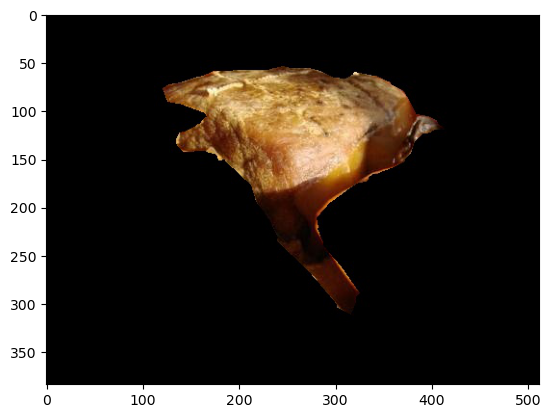

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# Read the image
image = Image.open('/home/samyakr2/food/FoodSeg103/Images/final_img_set/test/00007111_obj_47.jpg')
plt.imshow(image)

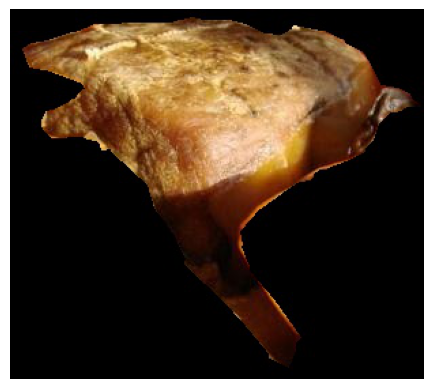

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the image using PIL
image = Image.open('/home/samyakr2/food/FoodSeg103/Images/final_img_set/test/00007111_obj_47.jpg')


# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a NumPy array
image_array = np.array(image_gray)

# Create a binary mask where nonzero pixels become white (255) and zero pixels become black (0)
binary_mask = (image_array > 0).astype(np.uint8) * 255

# Find the bounding box of the nonzero region
coords = np.argwhere(binary_mask)
y0, x0 = coords.min(axis=0)
y1, x1 = coords.max(axis=0)

# Crop the original image using the bounding box
cropped_image = image.crop((x0, y0, x1+1, y1+1))  # Need to add 1 to include the endpoint

# Display the cropped image using matplotlib
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()


In [5]:
import os
from PIL import Image
import numpy as np

# Path to the folder containing images
folder_path = '/home/samyakr2/food/FoodSeg103/Images/final_img_set/train'

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add more extensions if needed
        # Open the image using PIL
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        
        # Convert the image to grayscale
        image_gray = image.convert('L')
        
        # Convert the image to a NumPy array
        image_array = np.array(image_gray)
        
        # Create a binary mask where nonzero pixels become white (255) and zero pixels become black (0)
        binary_mask = (image_array > 0).astype(np.uint8) * 255
        
        # Find the bounding box of the nonzero region
        coords = np.argwhere(binary_mask)
        y0, x0 = coords.min(axis=0)
        y1, x1 = coords.max(axis=0)
        
        # Crop the original image using the bounding box
        cropped_image = image.crop((x0, y0, x1+1, y1+1))  # Need to add 1 to include the endpoint
        
        # Save the cropped image, replacing the original image
        cropped_image.save(image_path)

print("All images cropped and replaced successfully.")
